In [1]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
await download(path,"drug200.csv")
path="drug200.csv"

NameError: name 'download' is not defined

In [2]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [ ]:
url  = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
data = pd.read_csv(url, delimiter =",")


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


<p> Practice Question</p>
<p> What is the size of the data </p>

In [6]:
data.shape
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

### Preprocessing 

In [7]:
X = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [8]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [10]:
# target variable
y=data['Drug'].values
y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

### Setting up Decision Tree

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X,y, test_size=0.3, random_state=4)

In [13]:
print(X_trainset.shape)
print(y_trainset.shape)

(140, 5)
(140,)


### Modelling

In [14]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [18]:
predTree = drugTree.predict(X_testset)

In [19]:
print (predTree [0:5])
print (y_testset [0:5])

['drugY' 'drugY' 'drugY' 'drugY' 'drugC']
['drugY' 'drugY' 'drugY' 'drugY' 'drugC']


In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9666666666666667


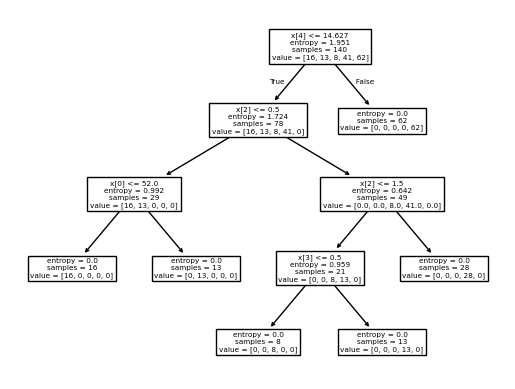

In [21]:
tree.plot_tree(drugTree)
plt.show()